# Exploratory Data Analysis

The Global Terrorist Database is publicly available to search, browse, and download on the <a href = 'https://www.start.umd.edu/gtd/'> GTD website</a>. In 2019, the
University of Maryland began a partnership with CHC Global to manage the commercial
distribution of the GTD. All users of the GTD must accept the terms of the End User License
Agreement.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud


import warnings

warnings.filterwarnings('ignore')

## Reading Data

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'cp1252')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape

(181691, 135)

The dataset is a huge dataset with around 1 L data points and 135 columns.

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data Cleaning

From observing and studying all the 135 columns we can drop the below mentioned column because of their repetitiveness, once as a ID and once as text. So we can drop the below mentioned columns.
- county
- region
- alternative
- attacktype1, attacktype2, attacktype3
- targtype1, targsubtype1, targtype2, targtsubtype2 , targtype3, targsubtype3
- natlty1, natly2, natly3
- claimmode, claimmode2, claimmode3
- weaptype1, weaptype2, weaptype3, weaptype4
- weapsubtype1, weapsubtype2, weapsubtype4
- propextent
- hostkidoutcome

In [5]:
df.drop(['country', 'region', 'alternative', 'attacktype1', 'attacktype2', 'attacktype3', 'targtype1', 'targsubtype1', 
         'targtype2', 'targsubtype2' , 'targtype3', 'targsubtype3', 'natlty1', 'natlty2', 'natlty3', 'claimmode', 'claimmode2',
         'claimmode3', 'weaptype1', 'weaptype2', 'weaptype3', 'weaptype4', 'weapsubtype1', 'weapsubtype2', 'weapsubtype4', 
         'propextent', 'hostkidoutcome'], axis = 1, inplace = True)

In [6]:
df = df.rename({'country_txt': 'Country', 'region_txt': 'Region'}, axis = 1)

After removing the redundant data now we need to check for null values.

In [7]:
df.columns[df.isna().sum() / df.shape[0] > 0.4]

Index(['approxdate', 'resolution', 'location', 'alternative_txt',
       'attacktype2_txt', 'attacktype3_txt', 'targtype2_txt',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gsubname',
       'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'claimmode_txt', 'claim2', 'claimmode2_txt', 'claim3',
       'claimmode3_txt', 'compclaim', 'weaptype2_txt', 'weapsubtype2_txt',
       'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4_txt',
       'weapsubtype4_txt', 'propextent_txt', 'propvalue', 'propcomment',
       'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry',
       'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus',
       'ransomnote', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite2',
       'scite3', 'related'],
      dtype='object')

As most of the columns have more than 40% missing values, we can just drop those as they will not help us to gain any insight.

In [8]:
df = df.loc[:, ~(df.isna().sum() / df.shape[0] > 0.4)]

In [9]:
df.shape

(181691, 50)

There are about 50 columns remaining after deleting all the null values

### Treating Missing Values

In [10]:
df.columns[df.isna().sum() / df.shape[0] > 0]

Index(['provstate', 'city', 'latitude', 'longitude', 'specificity', 'summary',
       'doubtterr', 'multiple', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1_txt', 'guncertain1', 'nperps', 'nperpcap', 'claimed',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'ishostkid', 'scite1'],
      dtype='object')

In [11]:
df.provstate.isna().sum()

421

There are 421 missing state values, which can be filled if we know the city values.

In [12]:
df.city.value_counts()

Unknown           9775
Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
                  ... 
Buhanga Katale       1
Hamidieh             1
Bakouma              1
Bandiagara           1
Ndaleni              1
Name: city, Length: 36674, dtype: int64

9775 of the data points have 'Unknown' as the value for city name. This is troublesome we need to take care of this as this would effect our analysis.

In [13]:
df.Country.isna().sum()

0

In [14]:
df.Country.value_counts()

Iraq             24636
Pakistan         14368
Afghanistan      12731
India            11960
Colombia          8306
                 ...  
Vatican City         1
New Hebrides         1
International        1
St. Lucia            1
North Korea          1
Name: Country, Length: 205, dtype: int64

As coutnry value is present for all data points and there are no unkown values, we can drop all the location based information and just keep the country value, as keeping anything else will impact negatively on our data analysis.

In [15]:
df[['provstate', 'city', 'latitude', 'longitude']].isna().sum()

provstate     421
city          434
latitude     4556
longitude    4557
dtype: int64

In [16]:
df.drop(['provstate', 'city', 'latitude', 'longitude'], axis = 1, inplace = True)
df.shape

(181691, 46)

On further inspection on the data dictionary from the <a href="https://www.start.umd.edu/gtd/downloads/Codebook.pdf"> Data Dictionary</a>, we can deleted the unwanted columns.

In [17]:
df.drop(['specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'multiple', 'targsubtype1_txt', 'corp1', 'weapdetail', 'nkillus', 
  'nwoundus', 'property', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'eventid', 'target1', 'natlty1_txt', 'nperps', 'nperpcap', 'nkillter', 'nwoundte'], axis = 1, inplace = True)

In [18]:
df.columns[df.isna().sum() / df.shape[0] > 0]

Index(['summary', 'doubtterr', 'guncertain1', 'claimed', 'weapsubtype1_txt',
       'nkill', 'nwound', 'ishostkid', 'scite1'],
      dtype='object')

In [19]:
df.summary.isna().sum()

66129

In [20]:
df.summary.value_counts()

09/00/2016: Sometime between September 18, 2016 and September 24, 2016, assailants detonated an explosive device at a civilian house in Dawr, Saladin, Iraq. There were no reported casualties resulting from the blast. No group claimed responsibility for the incident; however, sources attributed the attack to the Islamic State of Iraq and the Levant (ISIL).                                                              100
12/01/2016: Assailants detonated explosive devices that destroyed an electricity transmission tower in Albu Bali, Al Anbar, Iraq. This was one of 80 similar attacks targeting towers that resulted in the death of two military engineering team members. No group claimed responsibility for the incidents.                                                                                                                       80
05/29/2016: Security forces discovered and defused an explosives-rigged house in Sejar, Al Anbar, Iraq. No group claimed responsibility for the incident. 

As you can see this column is the summary of the attacks, as we do not know the specifics of the missing value we just replace them with `Not Found` (string).

In [21]:
df.summary = df.summary.fillna('Not Found')

In [22]:
df.doubtterr.isna().sum()

1

In [23]:
df.doubtterr.value_counts()

 0.0    138905
 1.0     29001
-9.0     13784
Name: doubtterr, dtype: int64

we can see that 0 and 1 is a binary representation and -9 may be a value for information not found, therefore we can fill -9 in the missing value.

In [24]:
df.doubtterr = df.doubtterr.fillna(-9)

In [25]:
round(df.isna().sum() / df.shape[0] * 100, 2)

iyear                0.00
imonth               0.00
iday                 0.00
extended             0.00
Country              0.00
Region               0.00
summary              0.00
doubtterr            0.00
success              0.00
suicide              0.00
attacktype1_txt      0.00
targtype1_txt        0.00
gname                0.00
guncertain1          0.21
individual           0.00
claimed             36.39
weaptype1_txt        0.00
weapsubtype1_txt    11.43
nkill                5.68
nwound               8.98
ishostkid            0.10
scite1              36.43
dbsource             0.00
INT_ANY              0.00
dtype: float64

In [26]:
df.claimed = df.claimed.fillna(-9)

In [27]:
df.weapsubtype1_txt.value_counts()

Unknown Explosive Type                       44980
Unknown Gun Type                             33137
Automatic or Semi-Automatic Rifle            17412
Vehicle                                       9900
Projectile (rockets, mortars, RPGs, etc.)     9848
Other Explosive Type                          7304
Handgun                                       6704
Grenade                                       5167
Landmine                                      4251
Arson/Fire                                    4141
Suicide (carried bodily by human being)       3245
Remote Trigger                                2719
Knife or Other Sharp Object                   2585
Sticky Bomb                                   1594
Molotov Cocktail/Petrol Bomb                  1239
Dynamite/TNT                                  1222
Rifle/Shotgun (non-automatic)                 1175
Gasoline or Alcohol                            844
Time Fuse                                      792
Pipe Bomb                      

In [28]:
df.weapsubtype1_txt.isna().sum()

20768

As there are significant amount of missing values we can fill them with 'Unknown'

In [29]:
df.weapsubtype1_txt = df.weapsubtype1_txt.fillna('Unknown')

In [30]:
df.nkill.value_counts()

0.0       88149
1.0       36576
2.0       14147
3.0        7738
4.0        4961
          ...  
122.0         1
133.0         1
1383.0        1
134.0         1
953.0         1
Name: nkill, Length: 205, dtype: int64

As it is a numeric column missing value won't effect the analysis and we will keep it as it is. Because there is no way we can guess no. of deaths.

In [31]:
df.scite1.value_counts()

Committee on Government Operations United States Senate, "Riots, Civil, and Criminal Disorders," U.S. Government Printing Office, August 6, 1970.    205
"ISIS detonates 5 empty homes in Daur using IEDs," Iraqi News, September 28, 2016.                                                                   106
"Iraq: Roundup of Security Incidents 18-24 March 2014," OSC Summary, March 25, 2014.                                                                  92
"Attack on 80 electricity towers in Anbar leaves 2 casualties," Iraqi News, December 1, 2016.                                                         80
Edward F. Mickolus, Terrorism, 1996-2001 : A Chronology, Imprint Westport, CT: Greenwood Press, 2002.                                                 77
                                                                                                                                                    ... 
Rory Mulholland, “Triangle of Death – Allies Target Rebels,” The Daily Telegraph, 

We can use the citations for word analysis.

In [32]:
df.shape

(181691, 24)

In [33]:
df.head()

,iyear,imonth,iday,extended,Country,Region,summary,doubtterr,success,suicide,...,individual,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nwound,ishostkid,scite1,dbsource,INT_ANY
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Not Found,0.0,1,0,...,0,-9.0,Unknown,Unknown,1.0,0.0,0.0,NaN,PGIS,0
1,1970,0,0,0,Mexico,North America,Not Found,0.0,1,0,...,0,-9.0,Unknown,Unknown,0.0,0.0,1.0,NaN,PGIS,1
2,1970,1,0,0,Philippines,Southeast Asia,Not Found,0.0,1,0,...,0,-9.0,Unknown,Unknown,1.0,0.0,0.0,NaN,PGIS,1
3,1970,1,0,0,Greece,Western Europe,Not Found,0.0,1,0,...,0,-9.0,Explosives,Unknown Explosive Type,NaN,NaN,0.0,NaN,PGIS,1
4,1970,1,0,0,Japan,East Asia,Not Found,-9.0,1,0,...,0,-9.0,Incendiary,Unknown,NaN,NaN,0.0,NaN,PGIS,1


In [34]:
df.ishostkid = df.ishostkid.apply(lambda x : np.nan if x == -9 else x)

## Data Visualization

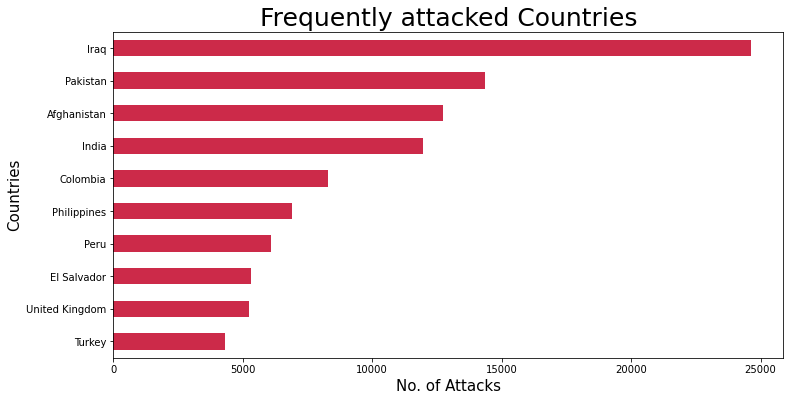

In [35]:
df['Country'].value_counts(ascending = True).tail(10).plot(kind = 'barh', figsize = (12, 6), color = '#CC2A49')
plt.title('Frequently attacked Countries', fontdict = {'size': 25})
plt.xlabel('No. of Attacks', fontdict = {'size': 15})
plt.ylabel('Countries', fontdict = {'size': 15})
plt.show()

Iraq was the most attacked country followed by Pakistan, Afghanistan and India.

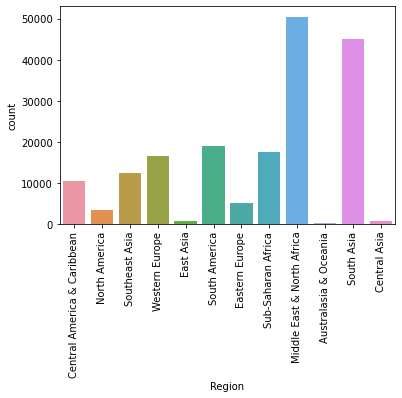

In [36]:
sns.countplot(x = 'Region', data = df)
plt.xticks(Rotation = 90)
plt.show()

We can see that Middle East & North America have had the most number of attacks.

### Countries with most fatalities

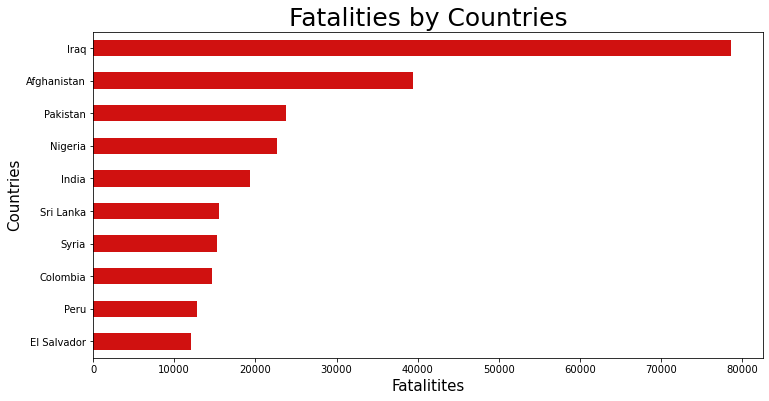

In [37]:
plt.figure(figsize = (12, 6))
df.groupby('Country')['nkill'].sum().sort_values(ascending = True).tail(10).plot(kind = 'barh', color = '#D01110')
plt.title('Fatalities by Countries', fontdict = {'size': 25})
plt.xlabel('Fatalitites', fontdict = {'size': 15})
plt.ylabel('Countries', fontdict = {'size': 15})
plt.show()

Iraq has highest fatalities as there were more number of attacks in the same region.

### No. of Fatalities

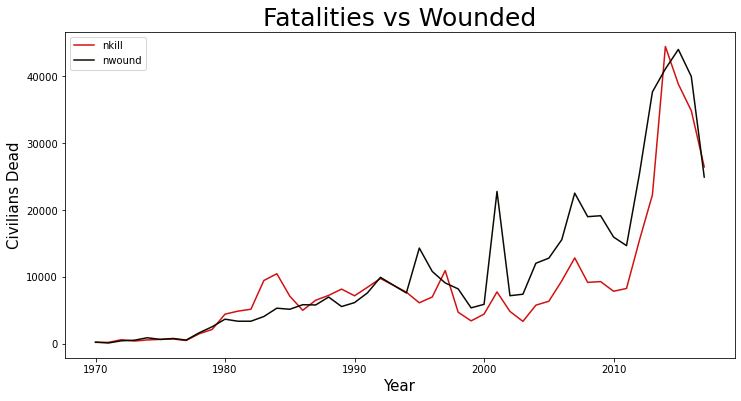

In [38]:
df.groupby('iyear')['nkill', 'nwound'].sum().plot(kind = 'line', figsize = (12, 6), color = ['#D01110', '#0A0A00'])
plt.title('Fatalities vs Wounded', fontdict = {'size': 25})
plt.xlabel('Year', fontdict = {'size': 15})
plt.ylabel('Civilians Dead', fontdict = {'size': 15})
plt.show()

The spike in wounds around 2001 represents the september 11 attacks and the 2015 - 2016 spike tells us that the most attacks have happened in that year. Which include Turkey–PKK conflict, Yemen Civil War and War in Afghanistan.

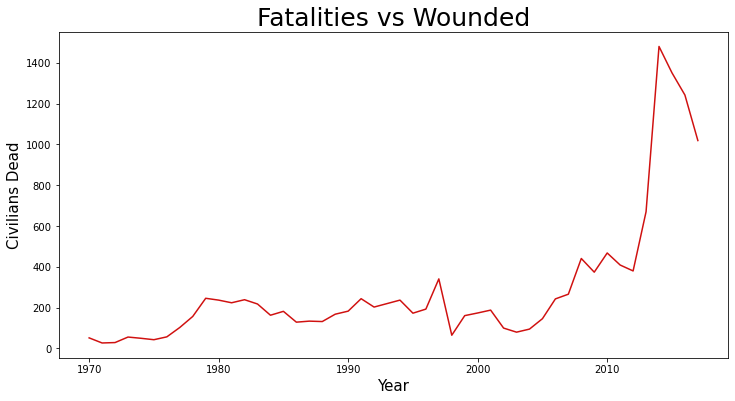

In [39]:
df.groupby('iyear')['ishostkid'].sum().plot(kind = 'line', figsize = (12, 6), color = ['#D01110', '#0A0A00'])
plt.title('Fatalities vs Wounded', fontdict = {'size': 25})
plt.xlabel('Year', fontdict = {'size': 15})
plt.ylabel('Civilians Dead', fontdict = {'size': 15})
plt.show()

There is a similiar peak for both total number of kills and no of people taken as hostages around the same year.

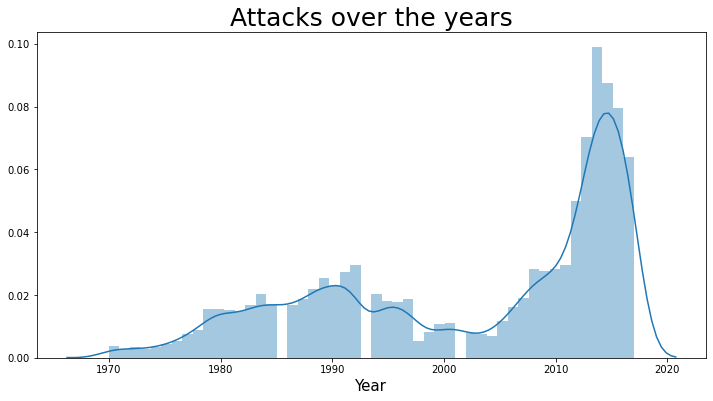

In [40]:
plt.figure(figsize = (12, 6))
sns.distplot(df['iyear'])
plt.title('Attacks over the years', fontdict = {'size': 25})
plt.xlabel('Year', fontdict = {'size': 15})
plt.show()

As you can see the number of fatalities and wounds has increased by the years 

### Weapons Used

In [41]:
df.weaptype1_txt = df.weaptype1_txt.replace('Other', 'Unknown')
df.weaptype1_txt = df.weaptype1_txt.replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')

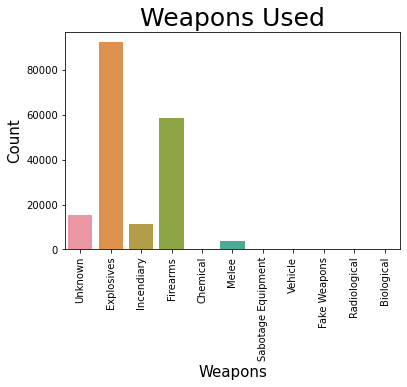

In [42]:
sns.countplot(x = 'weaptype1_txt', data = df)
plt.title('Weapons Used', fontdict = {'size': 25})
plt.xticks(rotation = 90)
plt.xlabel('Weapons', fontdict = {'size': 15})
plt.ylabel('Count', fontdict = {'size': 15})
plt.show()

Weapons used in most of the attacks were either explosive or firearms.

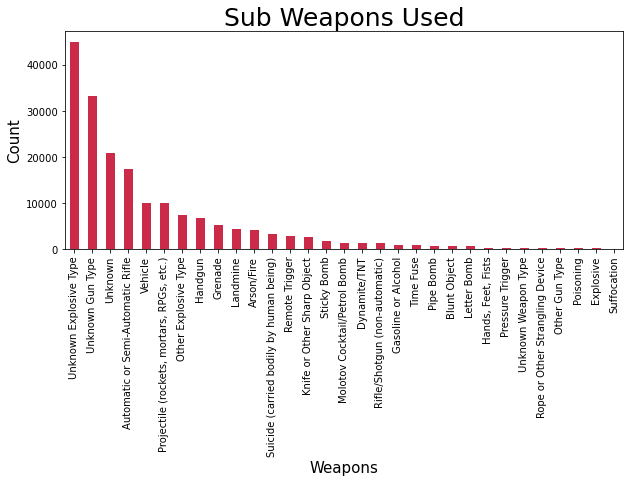

In [43]:
df['weapsubtype1_txt'].value_counts().plot(kind = 'bar', figsize = (10, 4), color = '#CC2A49')
plt.title('Sub Weapons Used', fontdict = {'size': 25})
plt.xlabel('Weapons', fontdict = {'size': 15})
plt.ylabel('Count', fontdict = {'size': 15})
plt.show()

### Deaths by Weapon

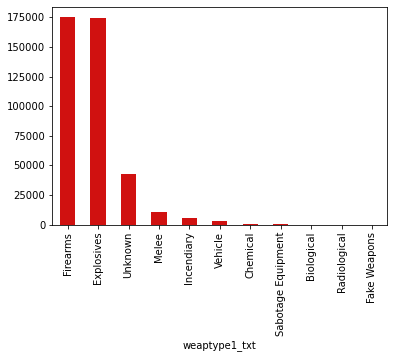

In [44]:
df.groupby('weaptype1_txt')['nkill'].sum().sort_values(ascending = False).plot(kind = 'bar', color = '#D01110')
plt.show()

Firearms and Explosives were the weapons which casued the most fatalities.

### Active Terrorist Group

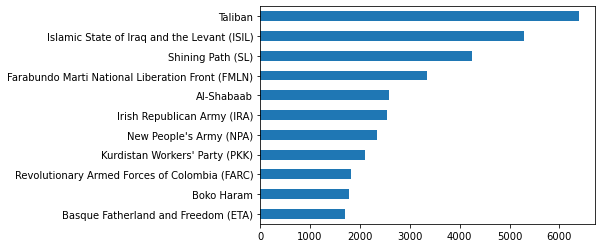

In [45]:
df[(df['guncertain1'] == 0) & (df['gname'] != 'Unknown')]['gname'].value_counts(ascending = True).tail(11).plot(kind = 'barh')
plt.show()

The most active terror group is Taliban followed by ISIL.

In [46]:
df.INT_ANY = df.INT_ANY.apply(lambda x : np.nan if x == -9 else x)

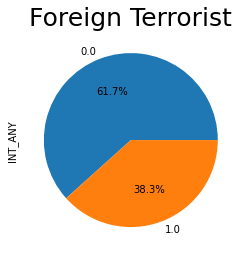

In [47]:
df.INT_ANY.value_counts().plot(kind = 'pie', autopct="%.1f%%")
plt.title('Foreign Terrorist', fontdict = {'size': 25})
plt.show()

The attack was international only 38%  of the time, where the terrorist group was not of the same nationality as that of the place of attack.

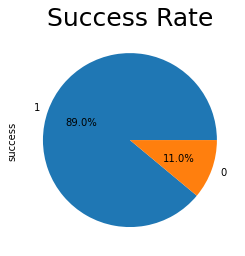

In [48]:
df.success.value_counts().plot(kind = 'pie', autopct="%.1f%%")
plt.title('Success Rate', fontdict = {'size': 25})
plt.show()

Terrorists succeeding on achieving their attacktype1 is over 88%

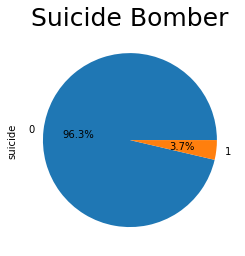

In [49]:
df.suicide.value_counts().plot(kind = 'pie', autopct="%.1f%%")
plt.title('Suicide Bomber', fontdict = {'size': 25})
plt.show()

There are less number of suicide bombers or the terrorists dying on the scene of attack.

### Frequent Attack Type

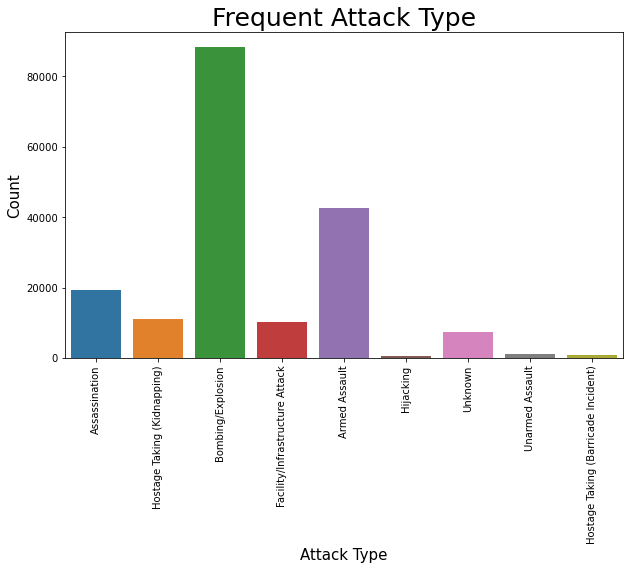

In [50]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'attacktype1_txt', data = df)
plt.title('Frequent Attack Type', fontdict = {'size': 25})
plt.xlabel('Attack Type', fontdict = {'size': 15})
plt.ylabel('Count', fontdict = {'size': 15})
plt.xticks(rotation = 90)
plt.show()

In most of the attacks Bombing/Explosion was the type of primary attack type.

### Word Analysis

In [51]:
d = {}

stop_words = set(stopwords.words('english'))  

def addDict(line):
    if line != 'Not Found':
        words = line.split(' ')
        for word in words:
            if word not in stop_words:
                if word.lower() in d:
                    d[word.lower()] = d[word.lower()] + 1
                else: 
                    d[word.lower()] = 1

In [52]:
for i in df['summary']:
    addDict(i)

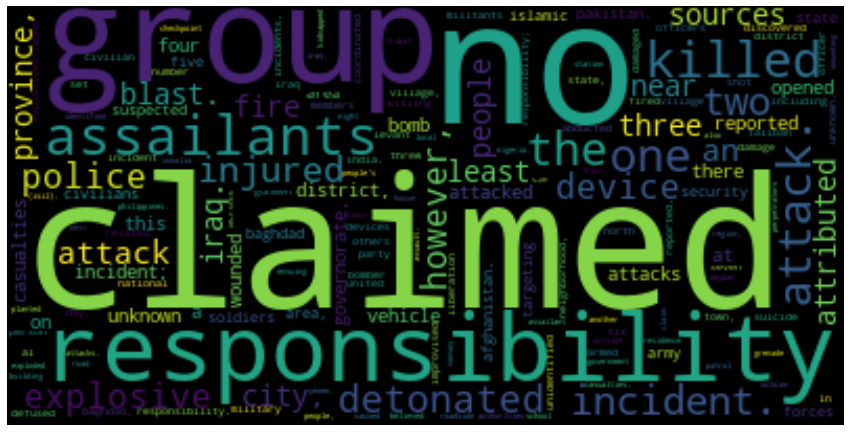

In [53]:
wc = WordCloud().generate_from_frequencies(d)
plt.figure(figsize = (15, 25))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

From the above cloud we can see that claimed has come up more number of times in the summary of the attack.

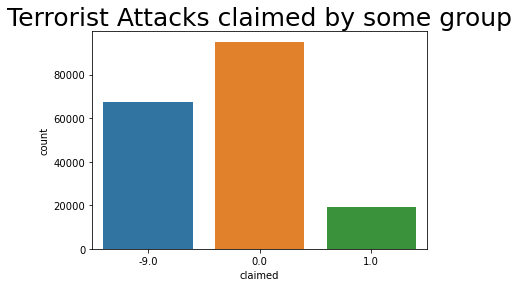

In [54]:
sns.countplot(x= 'claimed', data = df)
plt.title('Terrorist Attacks claimed by some group', fontdict = {'size': 25})
plt.show()

But from the claimed data we can see that not most of the attacks were claimed by any groups. Most of them were not claimed by any and half of them were missing values.

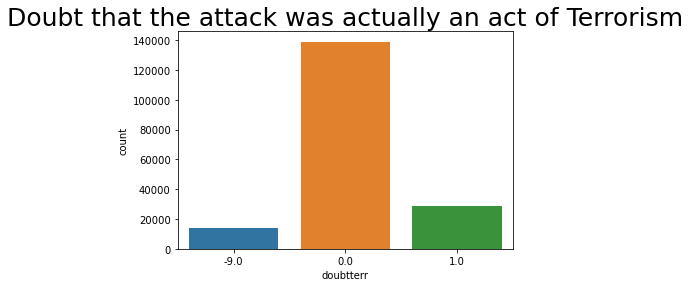

In [55]:
sns.countplot(x= 'doubtterr', data = df)
plt.title('Doubt that the attack was actually an act of Terrorism', fontdict = {'size': 25})
plt.show()

doubtterr variable defines whether the attack was doubtful to be a terror attack if 1 and if 0 there was no doubt it was a terror attack. So from the above graph you can see that most of the attacks were actual act of terrorism

### Observations:
- Iraq has the highest number of attacks throught the years also most fatalities were also from Iraq.
- Middle East and South Asia has saw the most number of attacks throught the years.
- Year 2015-2016 saw the most number of attacks and hence more number of fatalities.
- Explosives and Firearms were the weapons used in most of the attacks.
- 4 out of 10 times the terrorist were international.

### Inferences:
- As Firearms and Explosives were the weapons used most of the time, measures should be taken to detect explosives or firearms at all cost and at all places.
- As 4 out of 10 times the terrorist were international, things like background check should be done thoroughly.